In [154]:
import pandas as pd
import pylab as plt
import imageio
%matplotlib inline

kiez = pd.read_csv('~/Projects/spiced/week1/air_bnb_dataset/listings.csv')
kiez.shape

(22552, 16)

In [174]:
# data cleaning
# eliminate flats with value below 1 Euro
kiez2 = kiez[kiez['price'] <= 1]
kiez3 = kiez
kiez3.drop(kiez2.index)
#kiez3.shape
#kiez3.drop([1])

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,2217,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,2986,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,3718,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,17391,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
5,9991,33852,Pankow,Prenzlauer Berg Südwest,52.533031,13.416047,Entire home/apt,180,6,6,2018-07-23,0.15,1,137
6,14325,55531,Pankow,Prenzlauer Berg Nordwest,52.547846,13.405562,Entire home/apt,70,90,23,2018-11-01,0.23,3,129
7,16401,59666,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.510514,13.457850,Private room,120,30,0,NaN,NaN,1,365
8,16644,64696,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.504792,13.435102,Entire home/apt,90,60,48,2017-12-14,0.47,2,159
9,17409,67590,Pankow,Prenzlauer Berg Südwest,52.529071,13.412843,Private room,45,3,279,2018-10-31,2.83,1,42


In [168]:
# anonymize data
kiez3.pop("host_name")
kiez3.pop("name").head()

0    Berlin-Mitte Value! Quiet courtyard/very central
1                  Prenzlauer Berg close to Mauerpark
2                     Fabulous Flat in great Location
3                   BerlinSpot Schöneberg near KaDeWe
4                    BrightRoom with sunny greenview!
Name: name, dtype: object

In [169]:
#kiez_stack = pd.DataFrame(kiez3.stack())
#kiez_stack

In [170]:
prices_in_neighbourhood = kiez3.groupby(['neighbourhood_group'])['price'].mean()
prices_in_neighbourhood = pd.DataFrame(prices_in_neighbourhood)

In [171]:
prices_in_neighbourhood = prices_in_neighbourhood.sort_values(by=['price'])

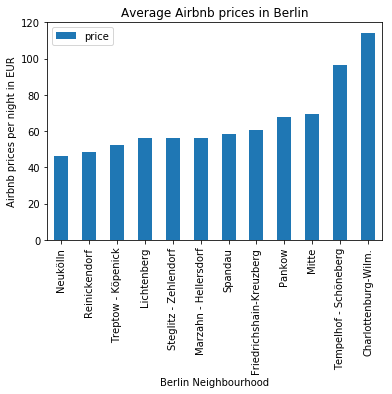

In [172]:
pic = prices_in_neighbourhood.plot.bar()
plt.ylabel('Airbnb prices per night in EUR')
plt.xlabel('Berlin Neighbourhood')
plt.title('Average Airbnb prices in Berlin')
plt.show()

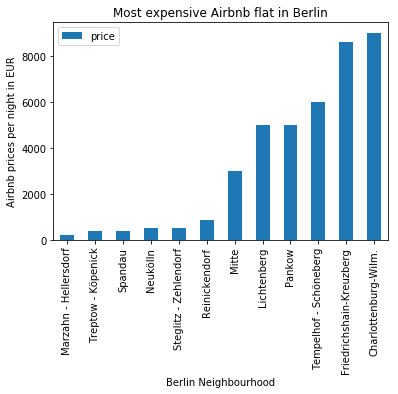

In [173]:
price_count_in_neighbourhood=kiez.groupby('neighbourhood_group')['price'].max()
price_count_in_neighbourhood = pd.DataFrame(price_count_in_neighbourhood)
price_count_in_neighbourhood = price_count_in_neighbourhood.sort_values(by=['price'])
pic2 = price_count_in_neighbourhood.plot.bar()
plt.title('Most expensive Airbnb flat in Berlin')
plt.ylabel('Airbnb prices per night in EUR')
plt.xlabel('Berlin Neighbourhood')
plt.show()